<a href="https://colab.research.google.com/github/muhammadnouman911/Audio-Classification/blob/main/Audio_Features_Checking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [4]:
# Replace these with your actual file paths
audio_paths = [
    "/content/drive/MyDrive/audios/1.opus", "/content/drive/MyDrive/audios/12.opus", "/content/drive/MyDrive/audios/3.opus", "/content/drive/MyDrive/audios/4.opus", "/content/drive/MyDrive/audios/5.opus",
    "/content/drive/MyDrive/audios/6.opus", "/content/drive/MyDrive/audios/11.opus", "/content/drive/MyDrive/audios/8.opus", "/content/drive/MyDrive/audios/9.opus" , "/content/drive/MyDrive/audios/10.opus"
]

In [5]:
def load_audio_fixed_length(audio_path, sr=22050, duration=5.0):
    y, _ = librosa.load(audio_path, sr=sr)
    target_length = int(sr * duration)

    if len(y) > target_length:
        y = y[:target_length]  # Trim
    else:
        padding = target_length - len(y)
        y = np.pad(y, (0, padding), 'constant')  # Pad

    return y

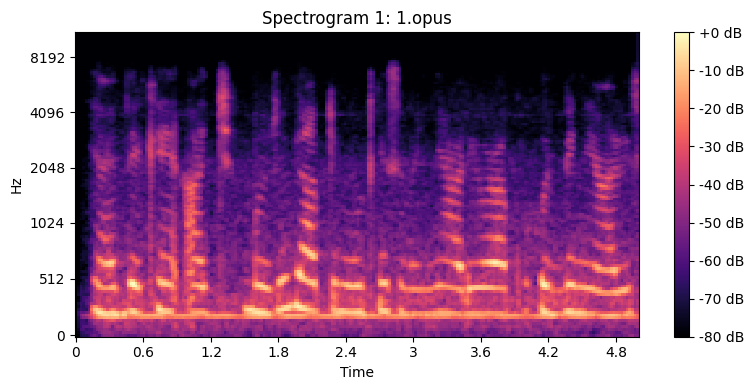

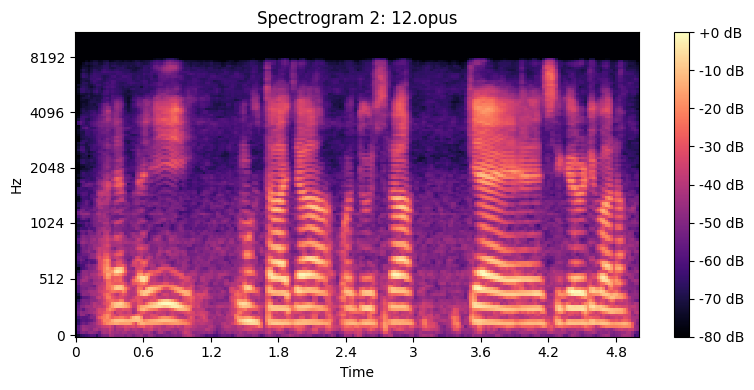

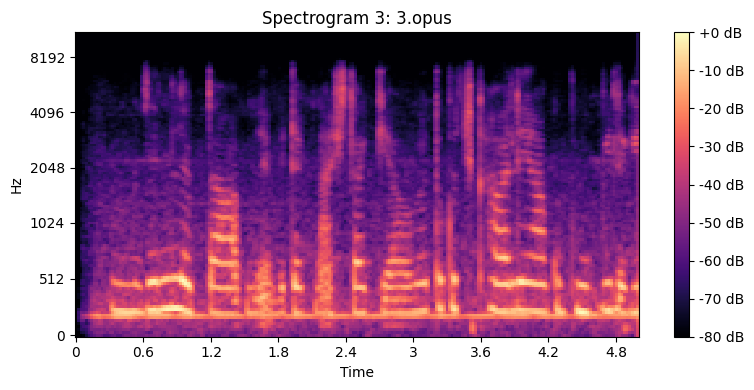

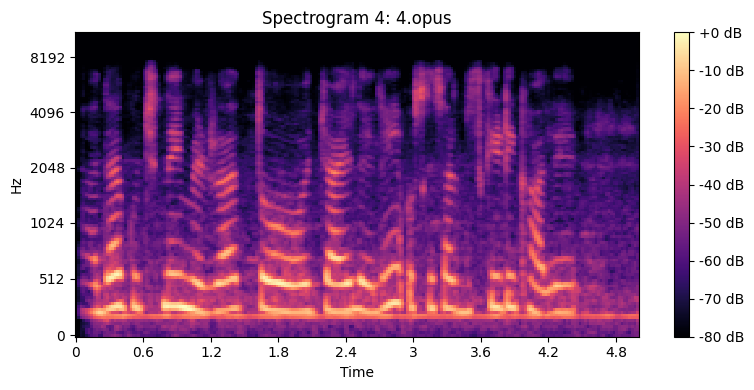

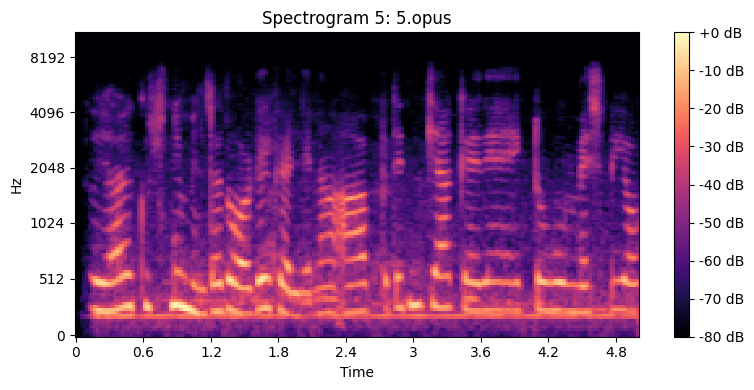

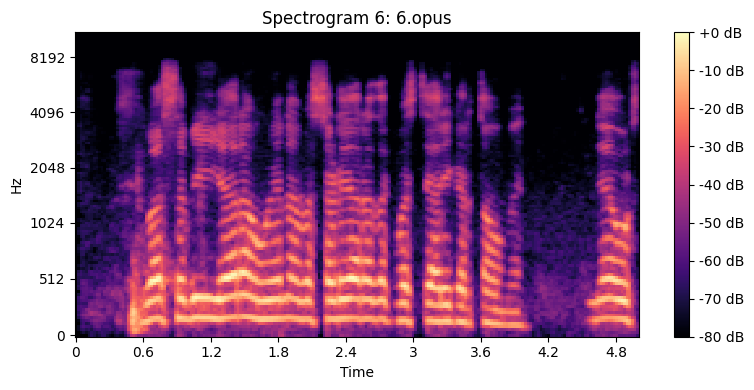

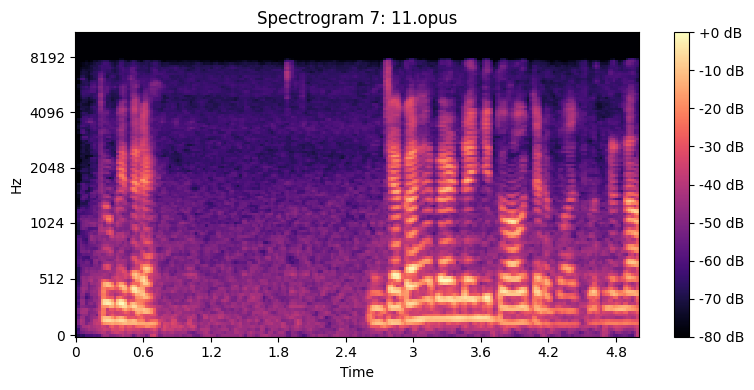

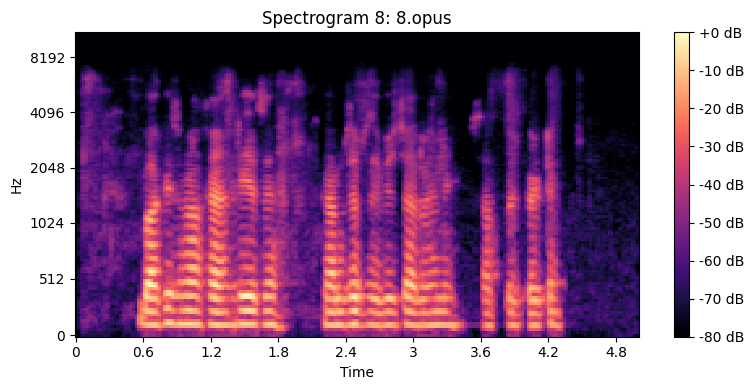

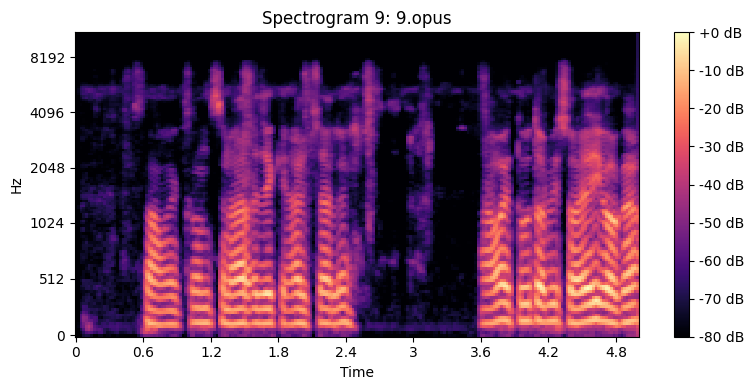

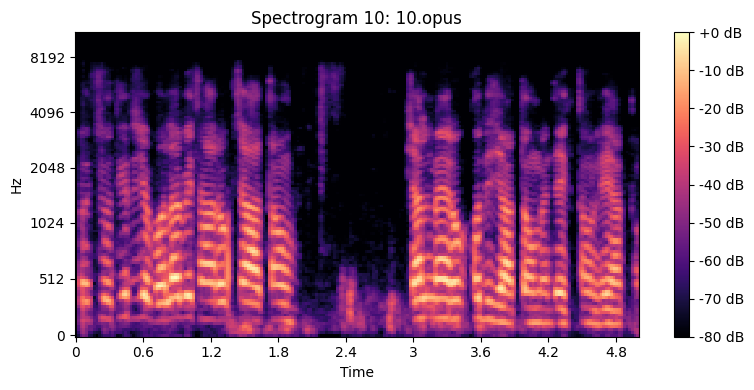

In [6]:

features = []
mel_spectrograms = []

def extract_mel_features(y, sr=22050):
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db

for idx, path in enumerate(audio_paths):
    y = load_audio_fixed_length(path)
    mel = extract_mel_features(y)
    mel_spectrograms.append(mel)

    # Feature vector = mean + std of mel-spectrogram
    feature_vector = np.concatenate([
        np.mean(mel, axis=1),
        np.std(mel, axis=1)
    ])
    features.append(feature_vector)

    # Plot spectrogram
    plt.figure(figsize=(8, 4))
    librosa.display.specshow(mel, sr=22050, x_axis='time', y_axis='mel', cmap='magma')
    plt.title(f"Spectrogram {idx+1}: {os.path.basename(path)}")
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()


In [7]:
features = np.array(features)
similarity_matrix = cosine_similarity(features)

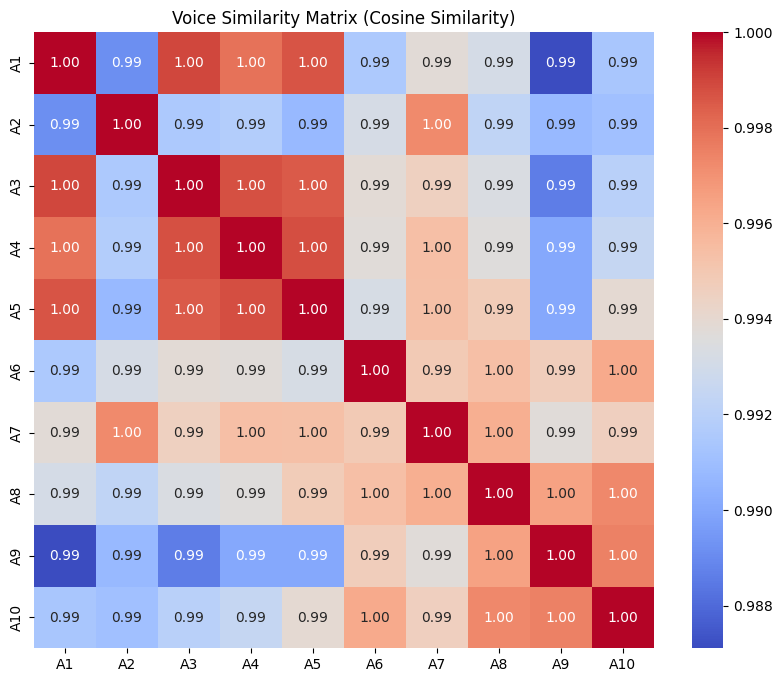

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=[f"A{i+1}" for i in range(10)],
            yticklabels=[f"A{i+1}" for i in range(10)])
plt.title("Voice Similarity Matrix (Cosine Similarity)")
plt.show()

In [9]:
np.fill_diagonal(similarity_matrix, 0)  # Ignore self-similarity
most_similar_pair = np.unravel_index(np.argmax(similarity_matrix), similarity_matrix.shape)
print(f"\n✅ Most similar voices are: Audio {most_similar_pair[0]+1} and Audio {most_similar_pair[1]+1}")
print(f"Similarity Score: {similarity_matrix[most_similar_pair]:.4f}")


✅ Most similar voices are: Audio 1 and Audio 3
Similarity Score: 0.9989


In [10]:
!pip install resemblyzer

Loaded the voice encoder model on cpu in 0.04 seconds.


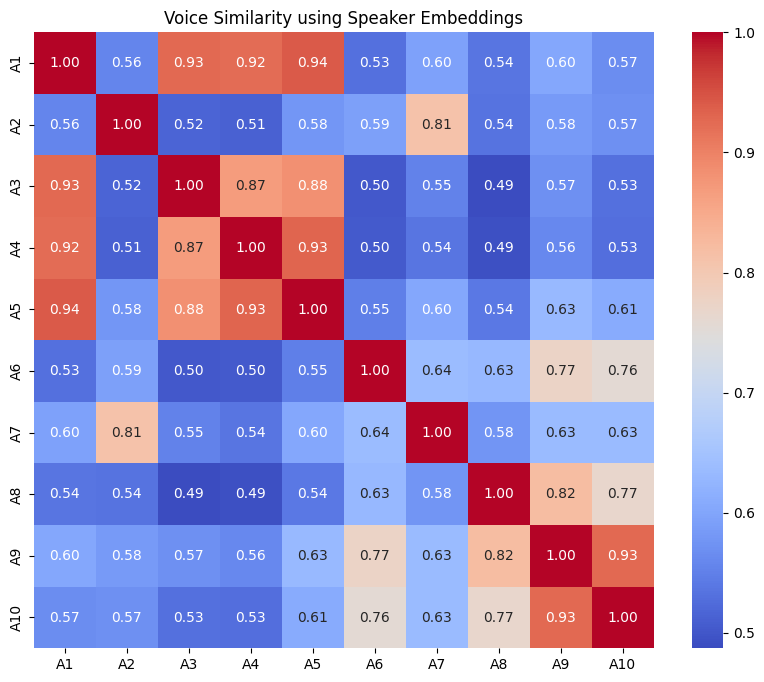

In [11]:
from resemblyzer import VoiceEncoder, preprocess_wav
from pathlib import Path
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Load model
encoder = VoiceEncoder()

# Load and encode 10 files
audio_paths = [
    "/content/drive/MyDrive/audios/1.opus", "/content/drive/MyDrive/audios/12.opus", "/content/drive/MyDrive/audios/3.opus", "/content/drive/MyDrive/audios/4.opus", "/content/drive/MyDrive/audios/5.opus",
    "/content/drive/MyDrive/audios/6.opus", "/content/drive/MyDrive/audios/11.opus", "/content/drive/MyDrive/audios/8.opus", "/content/drive/MyDrive/audios/9.opus" , "/content/drive/MyDrive/audios/10.opus"
]

embeddings = []

for path in audio_paths:
    wav = preprocess_wav(Path(path))
    embedding = encoder.embed_utterance(wav)
    embeddings.append(embedding)

# Compute cosine similarity
similarity_matrix = cosine_similarity(embeddings)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=[f"A{i+1}" for i in range(10)],
            yticklabels=[f"A{i+1}" for i in range(10)])
plt.title("Voice Similarity using Speaker Embeddings")
plt.show()
